In [12]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2725 - loss: 1.9405 - val_accuracy: 0.4968 - val_loss: 1.3772
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4765 - loss: 1.4504 - val_accuracy: 0.5671 - val_loss: 1.2121
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5383 - loss: 1.2915 - val_accuracy: 0.5999 - val_loss: 1.1236
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5748 - loss: 1.2034 - val_accuracy: 0.6199 - val_loss: 1.0525
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6055 - loss: 1.1131 - val_accuracy: 0.6382 - val_loss: 1.0104
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6371 - loss: 1.0335 - val_accuracy: 0.6533 - val_loss: 0.9947
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6527 - loss: 1.0002 - val_accuracy: 0.6574 - val_loss: 0.9765
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6687 - loss: 0.9478 - val_accu

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7358 - loss: 1.6109


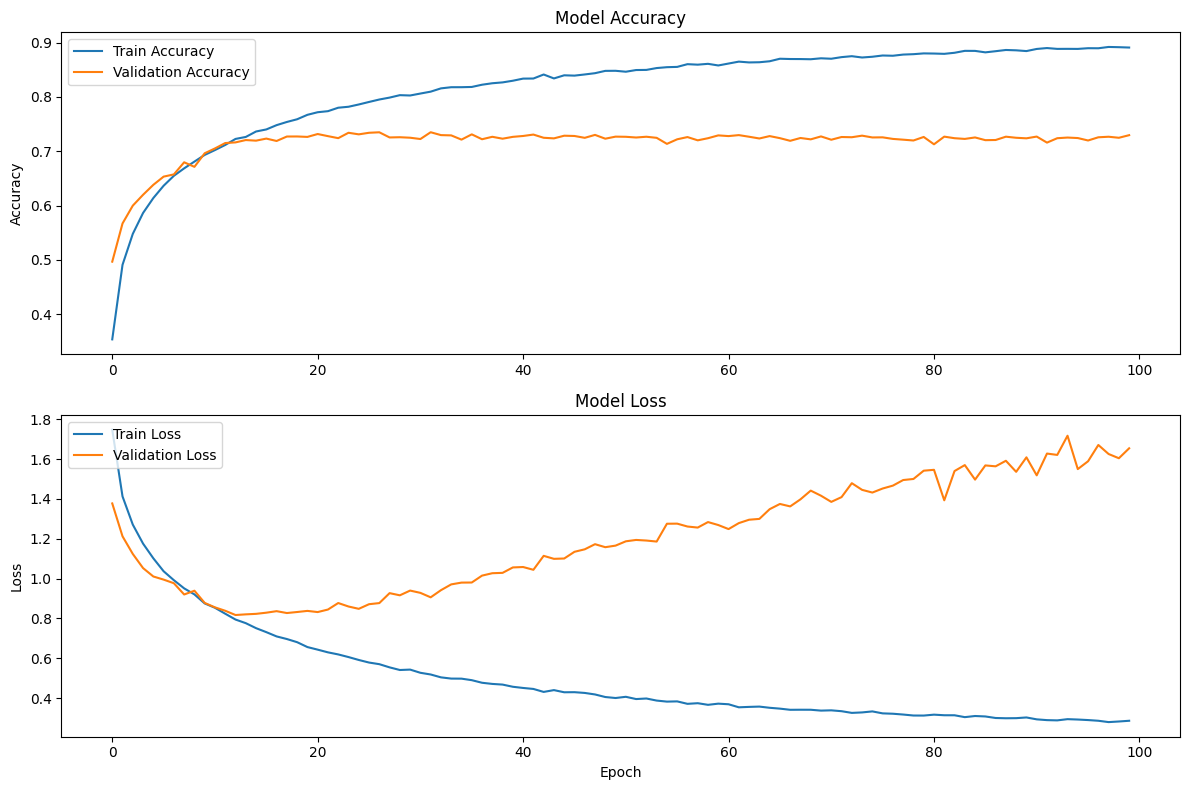

In [21]:
import matplotlib.pyplot as plt

# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [22]:
# Make predictions
predictions = model.predict(x_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


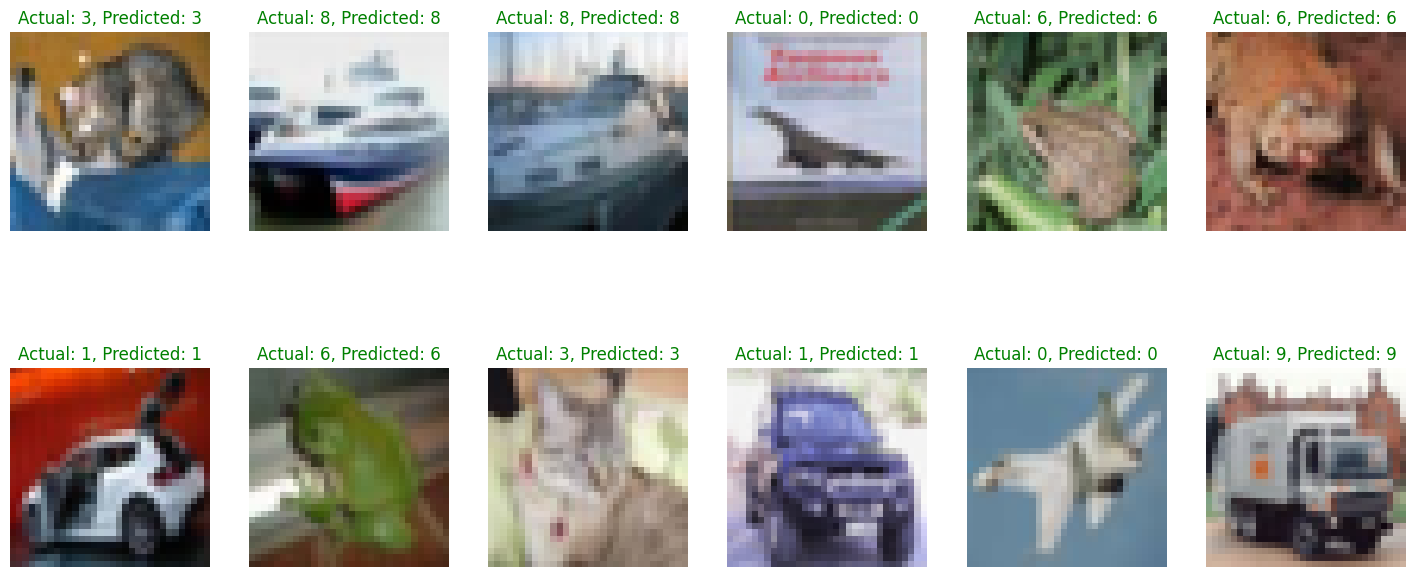

In [24]:
import numpy as np

# Plot predicted vs actual results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display the first 10 images and their predicted classes
plt.figure(figsize=(18, 8))
for i in range(12):
    ax = plt.subplot(2, 6, i + 1)
    plt.imshow(x_test[i])
    if y_pred_classes[i] == y_true[i]:
        plt.title(f"Actual: {y_true[i]}, Predicted: {y_pred_classes[i]}", color='green')
    elif y_pred_classes[i] != y_true[i]:
        plt.title(f"Actual: {y_true[i]}, Predicted: {y_pred_classes[i]}", color='red')
    plt.axis("off")